## Phase 2 : Compréhension et exploration des données : Examiner la structure et les caractéristiques principales des données.

### Configuration environnement

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

DATA_PATH = "../data/"
RAW_FILE = DATA_PATH + "raw/load_data.csv"

### Chargement du dataset

In [28]:
df = pd.read_csv(filepath_or_buffer=RAW_FILE, sep=",", header=0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


### Vérification les informations de base 

In [32]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


(None, (981, 13))

### Statistiques descriptives

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP002989,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


### Analyse de la répartition

In [87]:
for column in df.select_dtypes(include=['object']).drop(columns=["Loan_ID"]).columns:
    print(f"Valeurs uniques dans la colonne '{column}':")
    print(df[column].value_counts())
    print("\n")

Valeurs uniques dans la colonne 'Gender':
Gender
Male      775
Female    182
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Married':
Married
Yes    631
No     347
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Dependents':
Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Education':
Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Self_Employed':
Self_Employed
No     807
Yes    119
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Property_Area':
Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64


Valeurs uniques dans la colonne 'Loan_Status':
Loan_Status
Y    422
N    192
Name: count, dtype: int64




### Visualisation de la distribution

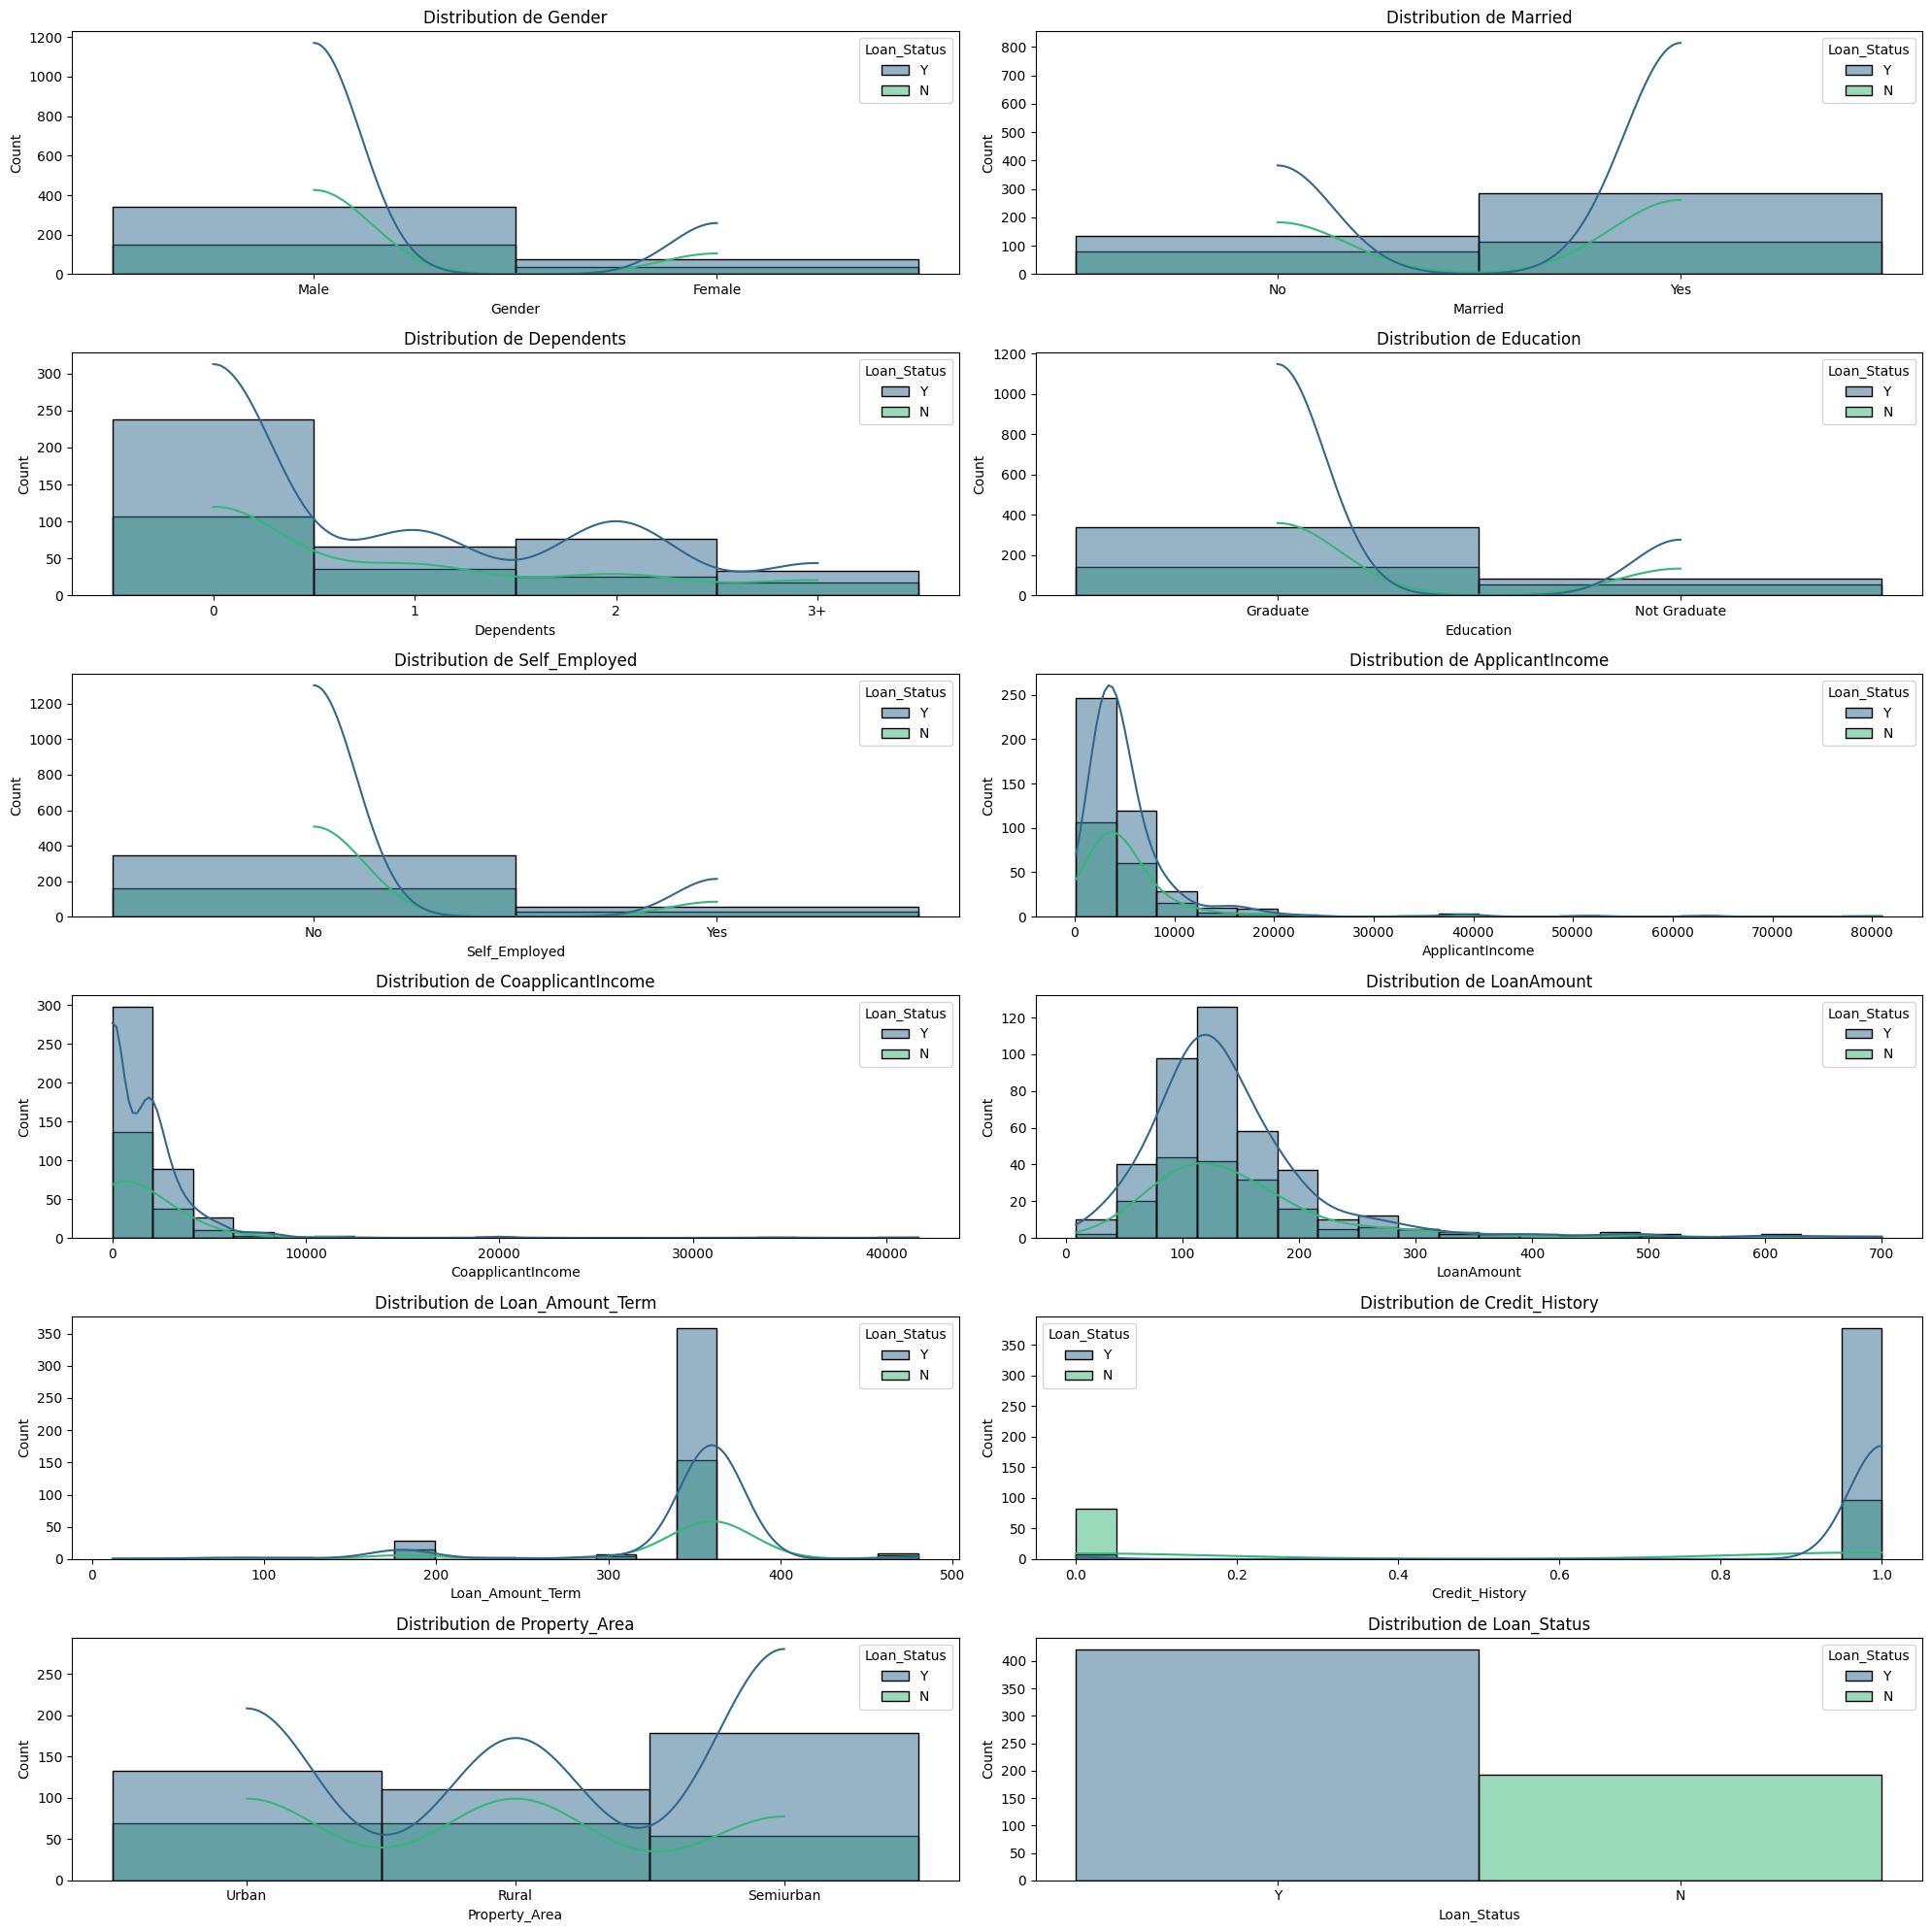

In [64]:
plt.figure(figsize=(20, 20))

# Nombre total de colonnes numériques
n_columns = len(df.columns[1:-1])

# Calculer les dimensions de la grille
n_rows = math.ceil(n_columns / 2)  # 2 colonnes par ligne

for i, column in enumerate(df.columns[1:]): 
    plt.subplot(n_rows, 2, i + 1)  # Adapter la grille dynamiquement
    sns.histplot(data=df, x=column, kde=True, hue="Loan_Status", palette="viridis", bins=20)
    plt.title(f"Distribution de {column}")

plt.tight_layout()
plt.show()

### Identification des Valeurs Manquantes

In [68]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### Identification des valeurs aberrantes

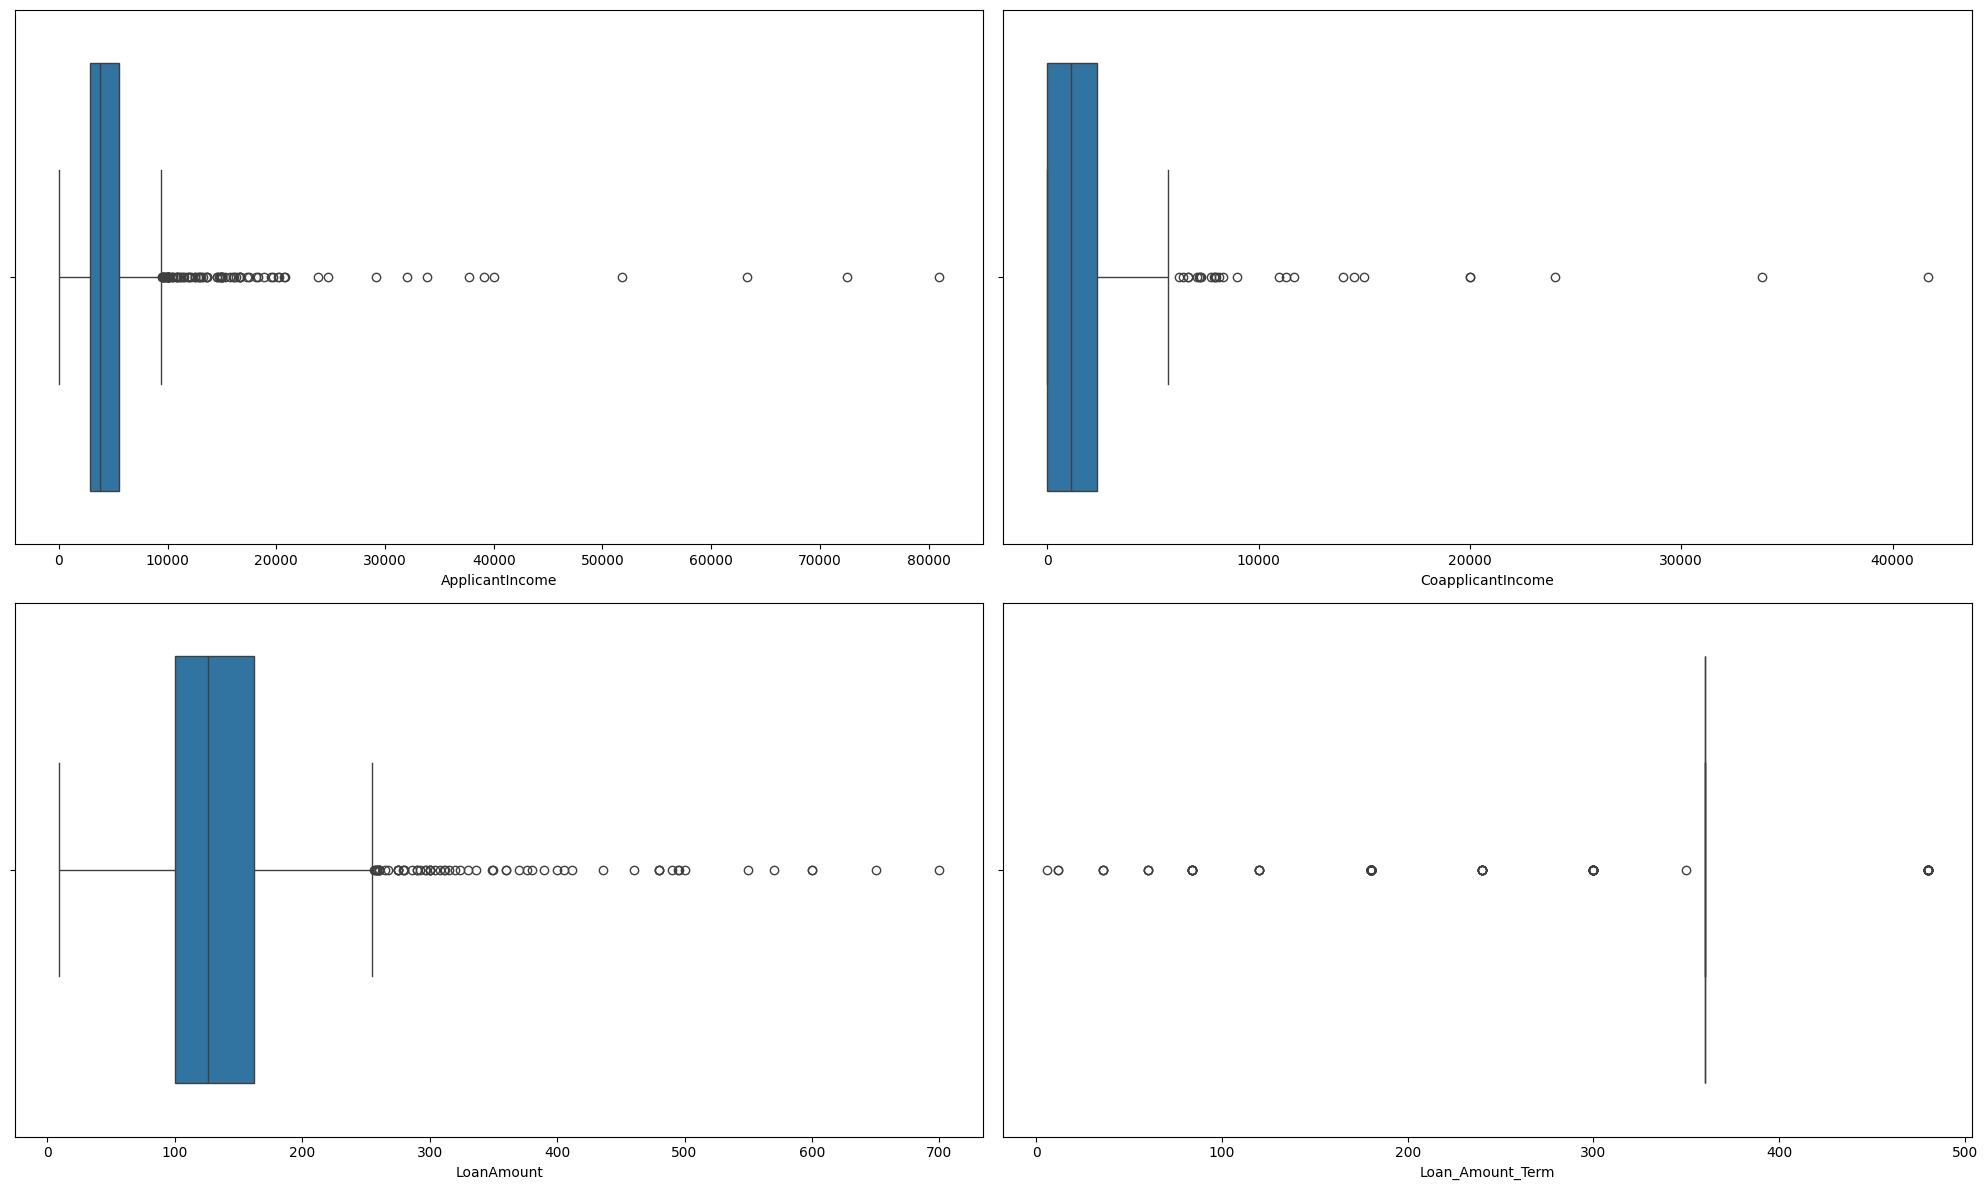

In [84]:

plt.figure(figsize=(20, 12))

# Nombre total de colonnes numériques
n_columns = len(df.select_dtypes("number").drop(columns=["Credit_History"]).columns)

# Calculer les dimensions de la grille
n_rows = math.ceil(n_columns / 2)  # 2 colonnes par ligne

for i, column in enumerate(df.select_dtypes("number").drop(columns=["Credit_History"]).columns): 
    plt.subplot(n_rows, 2, i + 1)  # Adapter la grille dynamiquement
    sns.boxplot(data=df[column], orient="h")

plt.tight_layout()
plt.show()

### Relation entre les caractéristiques

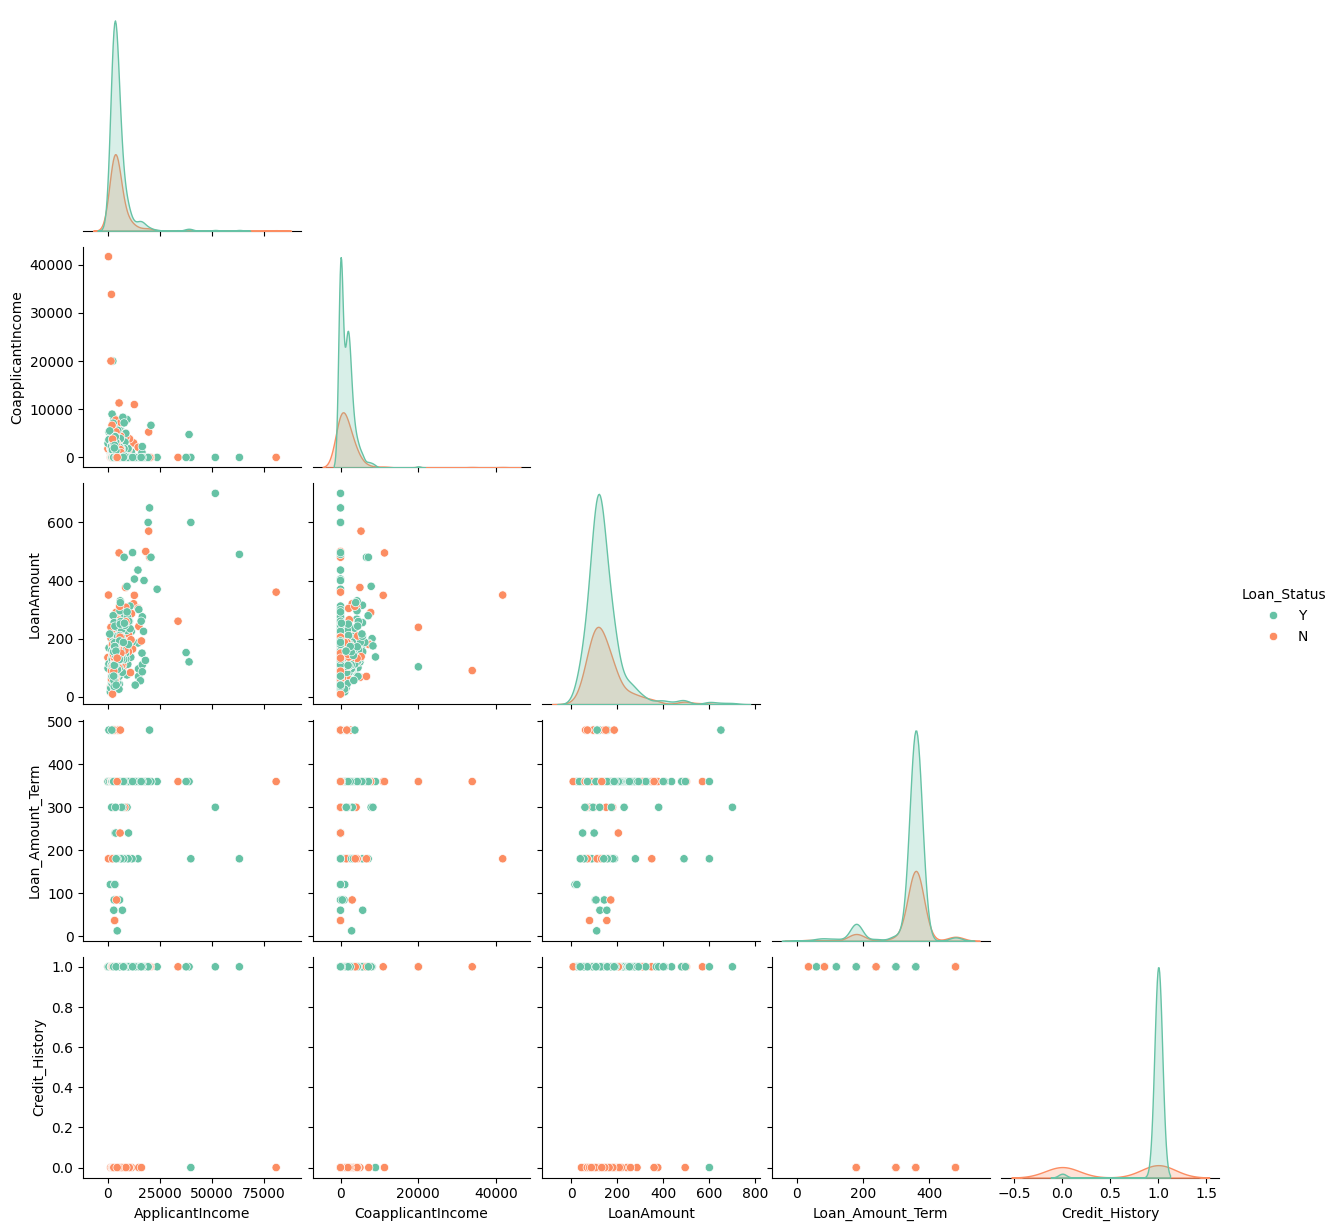

In [85]:
# Visualiser les relations entre les caractéristiques
sns.pairplot(df, hue="Loan_Status", palette="Set2", diag_kind="kde", corner=True)
plt.show()

### Tableau de correlation

Je voudrais analyser toutes les colonnes y compris les valeurs non numérique je vais donc tous les encoders

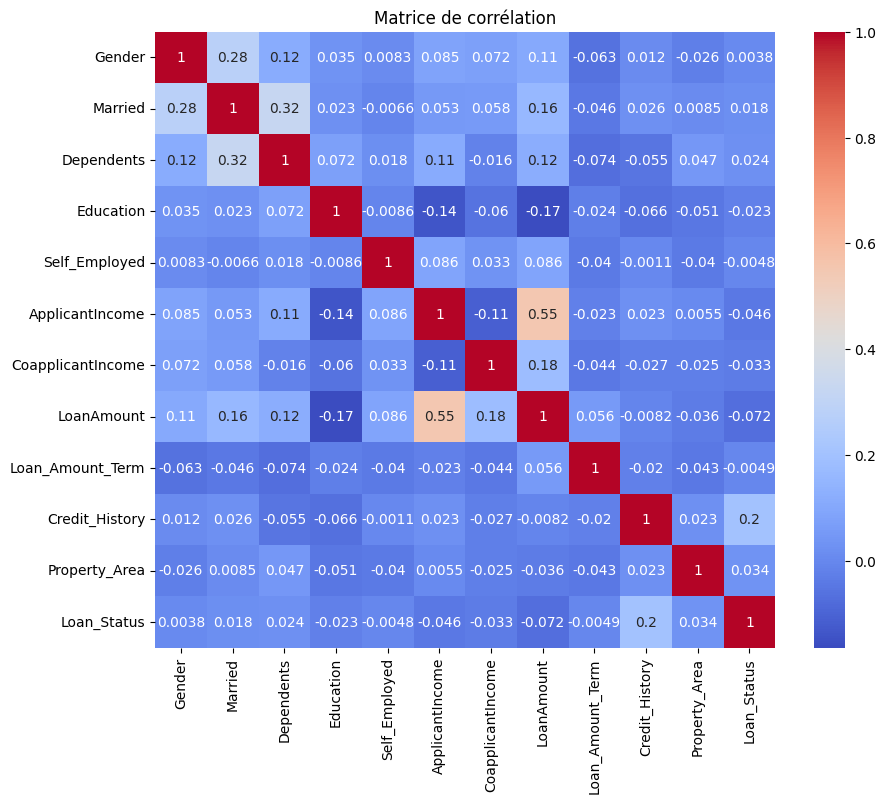

In [99]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.drop(columns=["Loan_ID"])
non_numeric_columns = df_corr.select_dtypes(exclude=["number"]).columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])
    label_encoders[col] = le  # Sauvegarder le transformateur pour décoder plus tard

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Correlation Forte :
- LoanAmount VS ApplicantIncome (0.55)

Correlationn Modérée : 
- Dependents VS Married (0.32)